### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Swimming']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 0       Swimming
1       Swimming
2       Swimming
3       Swimming
4       Swimming
          ...   
3854    Swimming
3855    Swimming
3856    Swimming
3857    Swimming
3858    Swimming
Name: Sport, Length: 3859, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 0           NA
1           NA
2           NA
3           NA
4           NA
         ...  
3854    Silver
3855        NA
3856        NA
3857        NA
3858        NA
Name: Medal, Length: 3859, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 3858
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3859 non-null   int64  
 1   Unnamed: 0_x    3859 non-null   int64  
 2   ID              3859 non-null   int64  
 3   Name            3859 non-null   object 
 4   Sex             3859 non-null   object 
 5   Age             3859 non-null   float64
 6   Height          3859 non-null   float64
 7   Weight          3859 non-null   float64
 8   NOC             3859 non-null   object 
 9   Games           3859 non-null   object 
 10  Year            3859 non-null   int64  
 11  Season          3859 non-null   object 
 12  City            3859 non-null   object 
 13  Sport           3859 non-null   object 
 14  Event           3859 non-null   object 
 15  Medal           3859 non-null   object 
 16  Team            3859 non-null   object 
 17  Unnamed: 0_y    3859 non-null   f

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2894, 1) (2894, 6)
Test Set  : (965, 1) (965, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
32,16.0,72.0,170.0,3.074931e+10,1300217.0,23649.366614,NA
737,19.0,55.0,163.0,1.700000e+12,192979029.0,8809.247351,NA
3240,20.0,55.0,172.0,2.600000e+11,146596557.0,1773.575078,NA
2779,16.0,63.0,175.0,1.020000e+12,31995000.0,31879.981247,NA
2093,19.0,72.0,180.0,2.870000e+11,49557573.3,5791.244020,NA
...,...,...,...,...,...,...,...
2389,26.0,60.0,170.0,1.330000e+11,4259800.0,31222.123104,NA
2168,19.0,65.0,180.0,2.070000e+12,59539717.0,34766.708750,NA
1809,25.0,63.0,168.0,6.690000e+11,184738458.0,3621.335846,NA
1738,16.0,62.0,175.0,3.480000e+12,82667685.0,42096.255629,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        3378
Gold       170
Silver     161
Bronze     150
Name: Medal, dtype: int64


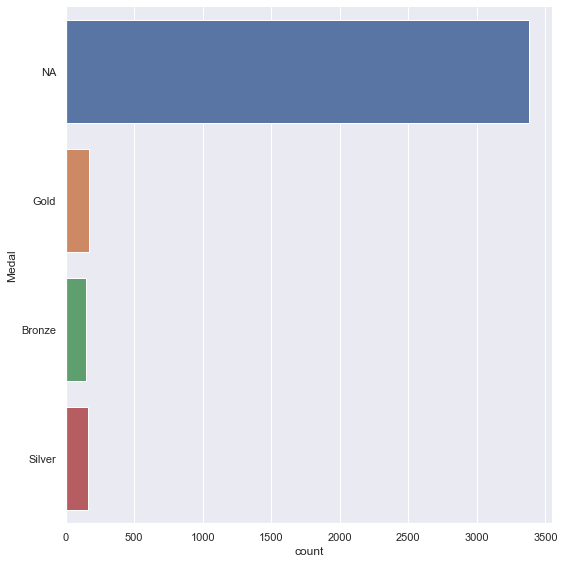

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(2894, 6) (2894, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(10064, 6) (10064, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,16.000000,72.000000,170.000000,3.074931e+10,1.300217e+06,23649.366614,NA
1,19.000000,55.000000,163.000000,1.700000e+12,1.929790e+08,8809.247351,NA
2,20.000000,55.000000,172.000000,2.600000e+11,1.465966e+08,1773.575078,NA
3,16.000000,63.000000,175.000000,1.020000e+12,3.199500e+07,31879.981247,NA
4,19.000000,72.000000,180.000000,2.870000e+11,4.955757e+07,5791.244020,NA
...,...,...,...,...,...,...,...
10059,21.903619,61.644572,183.515049,2.448735e+12,6.036526e+07,40570.326298,Silver
10060,29.801520,76.106842,187.702281,1.860000e+13,3.231275e+08,57562.414996,Silver
10061,22.518338,59.896332,179.066991,1.200000e+12,2.412716e+07,49736.481614,Silver
10062,24.000000,64.000000,176.000000,4.415703e+09,1.355847e+07,325.678570,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
653,24.0,69.0,176.0,1.540000e+12,22728254.0,67757.074521
2348,21.0,72.0,183.0,7.420000e+11,30769700.0,24114.632252
3371,31.0,69.0,177.0,1.230000e+13,292805298.0,42007.436628
1546,23.0,54.0,168.0,1.260000e+11,9817958.0,12833.625892
644,21.0,63.0,173.0,1.230000e+13,292805298.0,42007.436628
...,...,...,...,...,...,...
3043,31.0,65.0,176.0,2.400000e+12,59987905.0,40008.064959
3158,16.0,65.0,165.0,8.200248e+09,12395924.0,661.527773
867,20.0,59.0,163.0,4.050000e+11,67007855.0,6044.067520
3611,20.0,50.0,166.0,1.260000e+11,62958021.0,2001.333555


Number of Medal Types : 4
Bronze    2516
Gold      2516
NA        2516
Silver    2516
Name: Medal, dtype: int64


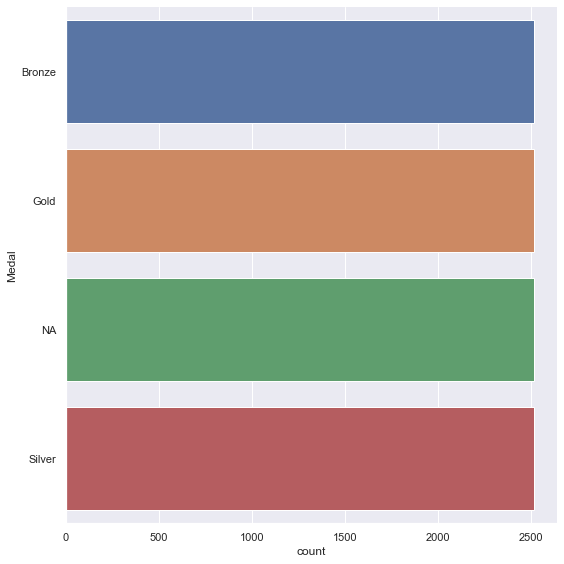

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (7548, 1) (7548, 6)
Test Set  : (2516, 1) (2516, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9058028616852146

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8529411764705882



<AxesSubplot:>

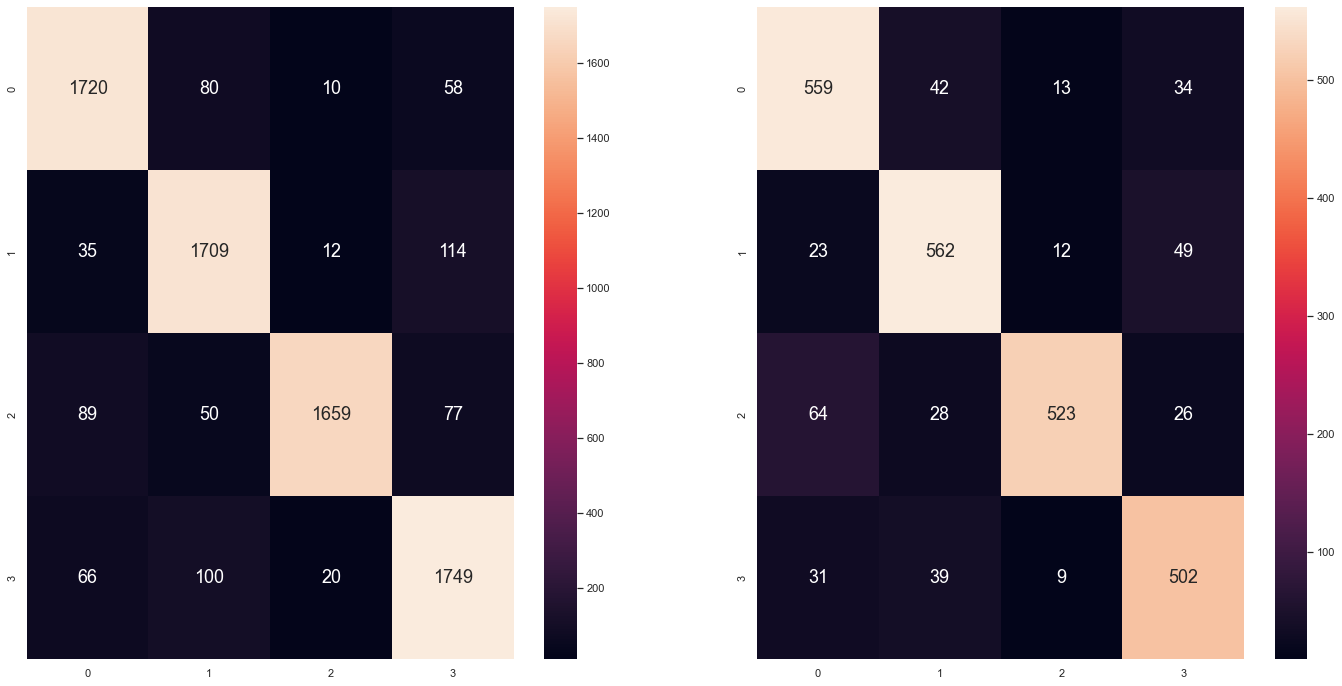

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

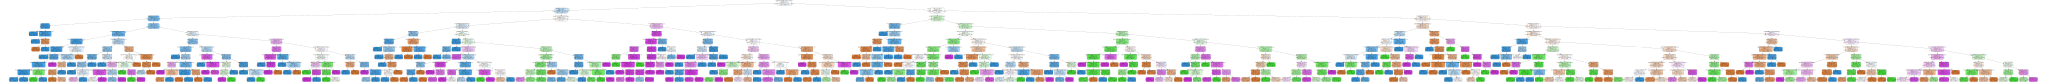

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_HOCKEY")

'Tree_female_HOCKEY.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7958549222797927


<AxesSubplot:>

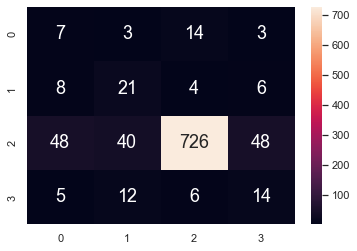

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})